# Explore here

## Paso 1: Carga del conjunto de datos

In [2]:
# Your code here
import pandas as pd
url_Con_CSV = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
Datos_Abnb = pd.read_csv(url_Con_CSV)
Datos_Abnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# Nos piden que convirtamos el raw del CSV en un Archivo
# Eso se hace con el comando "to_csv"
#Le Voy a poner el Nombre que tenia Originalmente "AB_NYC_2019.csv"
#Profesor Leonardo, la direccion Relativa del directorio "data" es ../data ya que el pade de explorer.ipynb esta en src

Datos_Abnb.to_csv("../data/raw/AB_NYC_2019.csv", index = False)


## Paso 2: Realiza un EDA completo

In [4]:
##  See nos pide Realizar un EDA completo
## Segun lo visto en Clases debemos ver la Estructura de los Datos
# Por lo que vamos a hacer Primero un Shape y luego un info 
# En este ejercicio llame al fram que contiene los datos "Datos_Abnb"
Datos_Abnb.shape


(48895, 16)

In [5]:
#
Datos_Abnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#Primera Conclusion:
Del info observo que los datos son 48895 Registros con 16 Columnas
Siendo 8 Columnas Categoricas y 6 Numericas.  LA Latitude y Longitude son Una sola pieza de Informacion y es del tipo Categorico. Y el id lo voy a quitar porque es solo un Key de Busqueda.

Los campos que estan presentando datos Nulos son los Siguientes:

name                            48879 non-null  object 

host_name                       48874 non-null  object 

last_review                     38843 non-null  object 

reviews_per_month               38843 non-null  float64

In [6]:
# Reviso si hay datos de NO_Aplican en el listado de Elementos
Datos_Abnb.isnull().sum().sort_values(ascending = False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
neighbourhood_group                   0
neighbourhood                         0
id                                    0
host_id                               0
longitude                             0
latitude                              0
room_type                             0
price                                 0
number_of_reviews                     0
minimum_nights                        0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Los Nulos que se encontraron estaban en las columans:
last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16

Host NAme no lo usare, porque tengo el Host_id y este esta completo, al menos no tiene Null
Name, en caso de necesitarlo se puede completar
HAy que ver en funcion del Restod de la data que tanta utilidad me da Last_review y reviws_per_Month

In [7]:
duplicados_por_columna = Datos_Abnb.apply(lambda col: col.duplicated(keep=False))
print(duplicados_por_columna)

          id   name  host_id  host_name  neighbourhood_group  neighbourhood  \
0      False  False     True       True                 True           True   
1      False  False     True       True                 True           True   
2      False  False    False       True                 True           True   
3      False  False    False      False                 True           True   
4      False  False    False       True                 True           True   
...      ...    ...      ...        ...                  ...            ...   
48890  False  False     True       True                 True           True   
48891  False  False     True       True                 True           True   
48892  False  False    False      False                 True           True   
48893  False  False     True       True                 True           True   
48894  False  False    False       True                 True           True   

       latitude  longitude  room_type  price  minim

In [8]:
#Los campos es logico que tengan elementos Dupicados. Como Neighbourhood, 
# Tipo de HAbitacion, host (puede ser el mismo), incluso la misma Latitud o 
# la misma longitud... Dificulto un caso donde Ambas sean la misma... pero se puede dar en eun Edificio, donde se tengan varios apartamentos.
#Lo que no deberia repetirse es el ID.


Ids_Duplicados = Datos_Abnb['id'].duplicated().sum()
print(f"The number of duplicated ID records is: {Ids_Duplicados}")

The number of duplicated ID records is: 0


Yo Esperaba que el "id" fuese unico, y de la prueba lo es.  En cuanto a los otros campos es logico que tengan elementos Dupicados.

HAsta ahora lo mas interesante han sido los "Null"

In [9]:
# En la clase recomiendan que antes de empezar a estudiar las grficas y las correlaciones, debemos concentrarnos en las columnas que efectivamente nos den informacion\
# Eso Incluye los "id", que son unicos por ser una clave de busqueda.

Datos_Reducidos=Datos_Abnb.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = False)
Datos_Reducidos.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


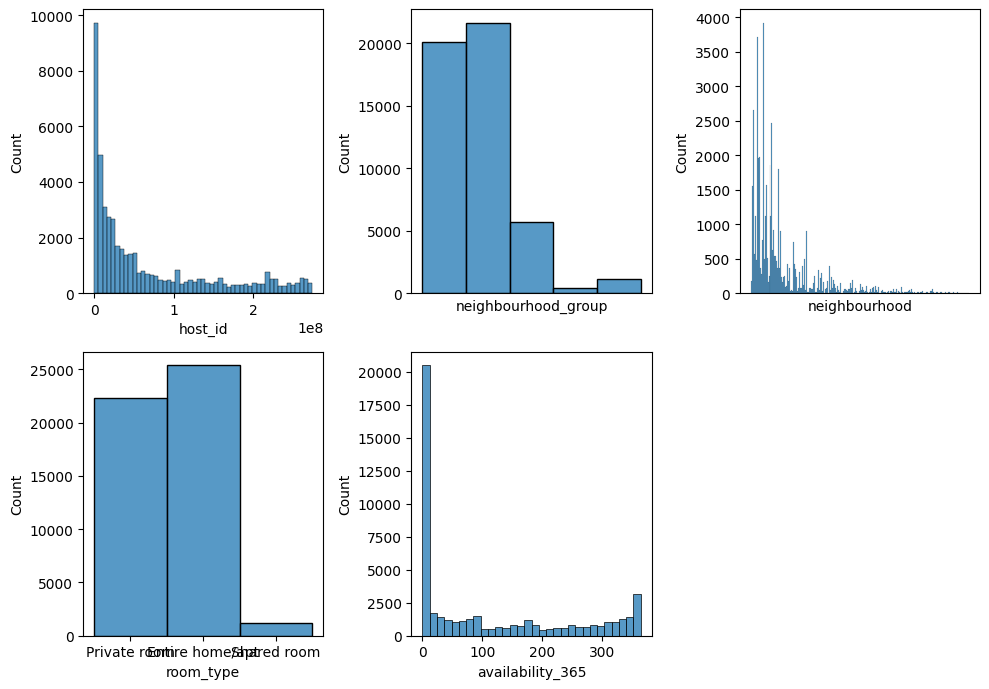

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize=(10, 7))

# Create Histogram
sns.histplot(ax = axis[0,0], data = Datos_Reducidos, x = "host_id")
sns.histplot(ax = axis[0,1], data = Datos_Reducidos, x = "neighbourhood_group").set_xticks([])
sns.histplot(ax = axis[0,2], data = Datos_Reducidos, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1,0], data = Datos_Reducidos, x = "room_type")
sns.histplot(ax = axis[1,1], data = Datos_Reducidos, x = "availability_365")
fig.delaxes(axis[1, 2])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

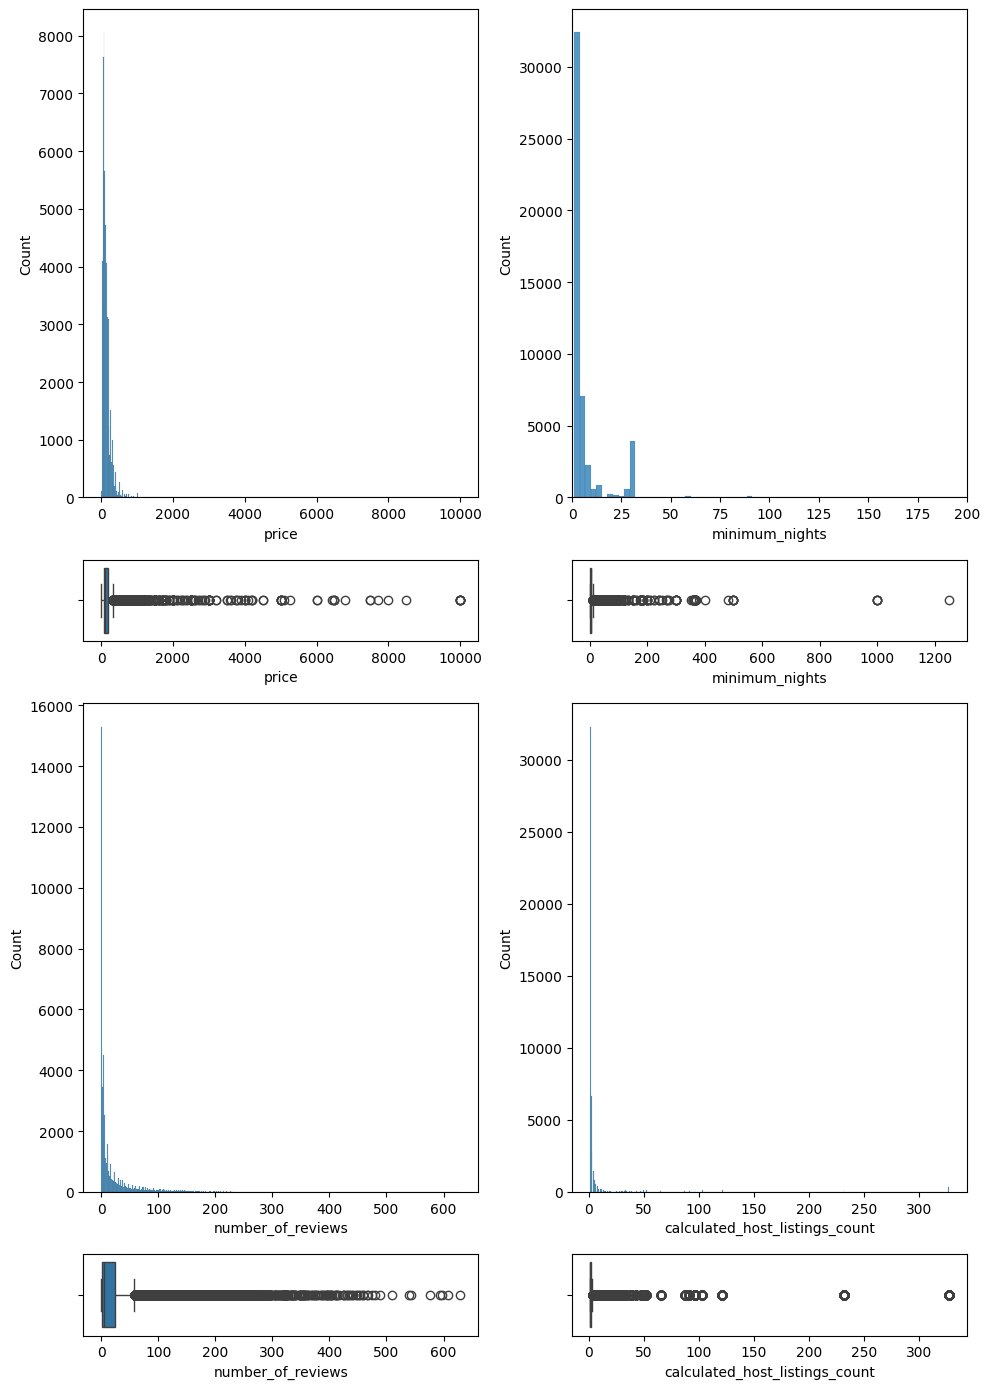

In [11]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = Datos_Reducidos, x = "price")
sns.boxplot(ax = axis[1, 0], data = Datos_Reducidos, x = "price")

sns.histplot(ax = axis[0, 1], data = Datos_Reducidos, x = "minimum_nights").set_xlim(0, 200)
sns.boxplot(ax = axis[1, 1], data = Datos_Reducidos, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = Datos_Reducidos, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = Datos_Reducidos, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = Datos_Reducidos, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[3, 1], data = Datos_Reducidos, x = "calculated_host_listings_count")


plt.tight_layout()
plt.show()

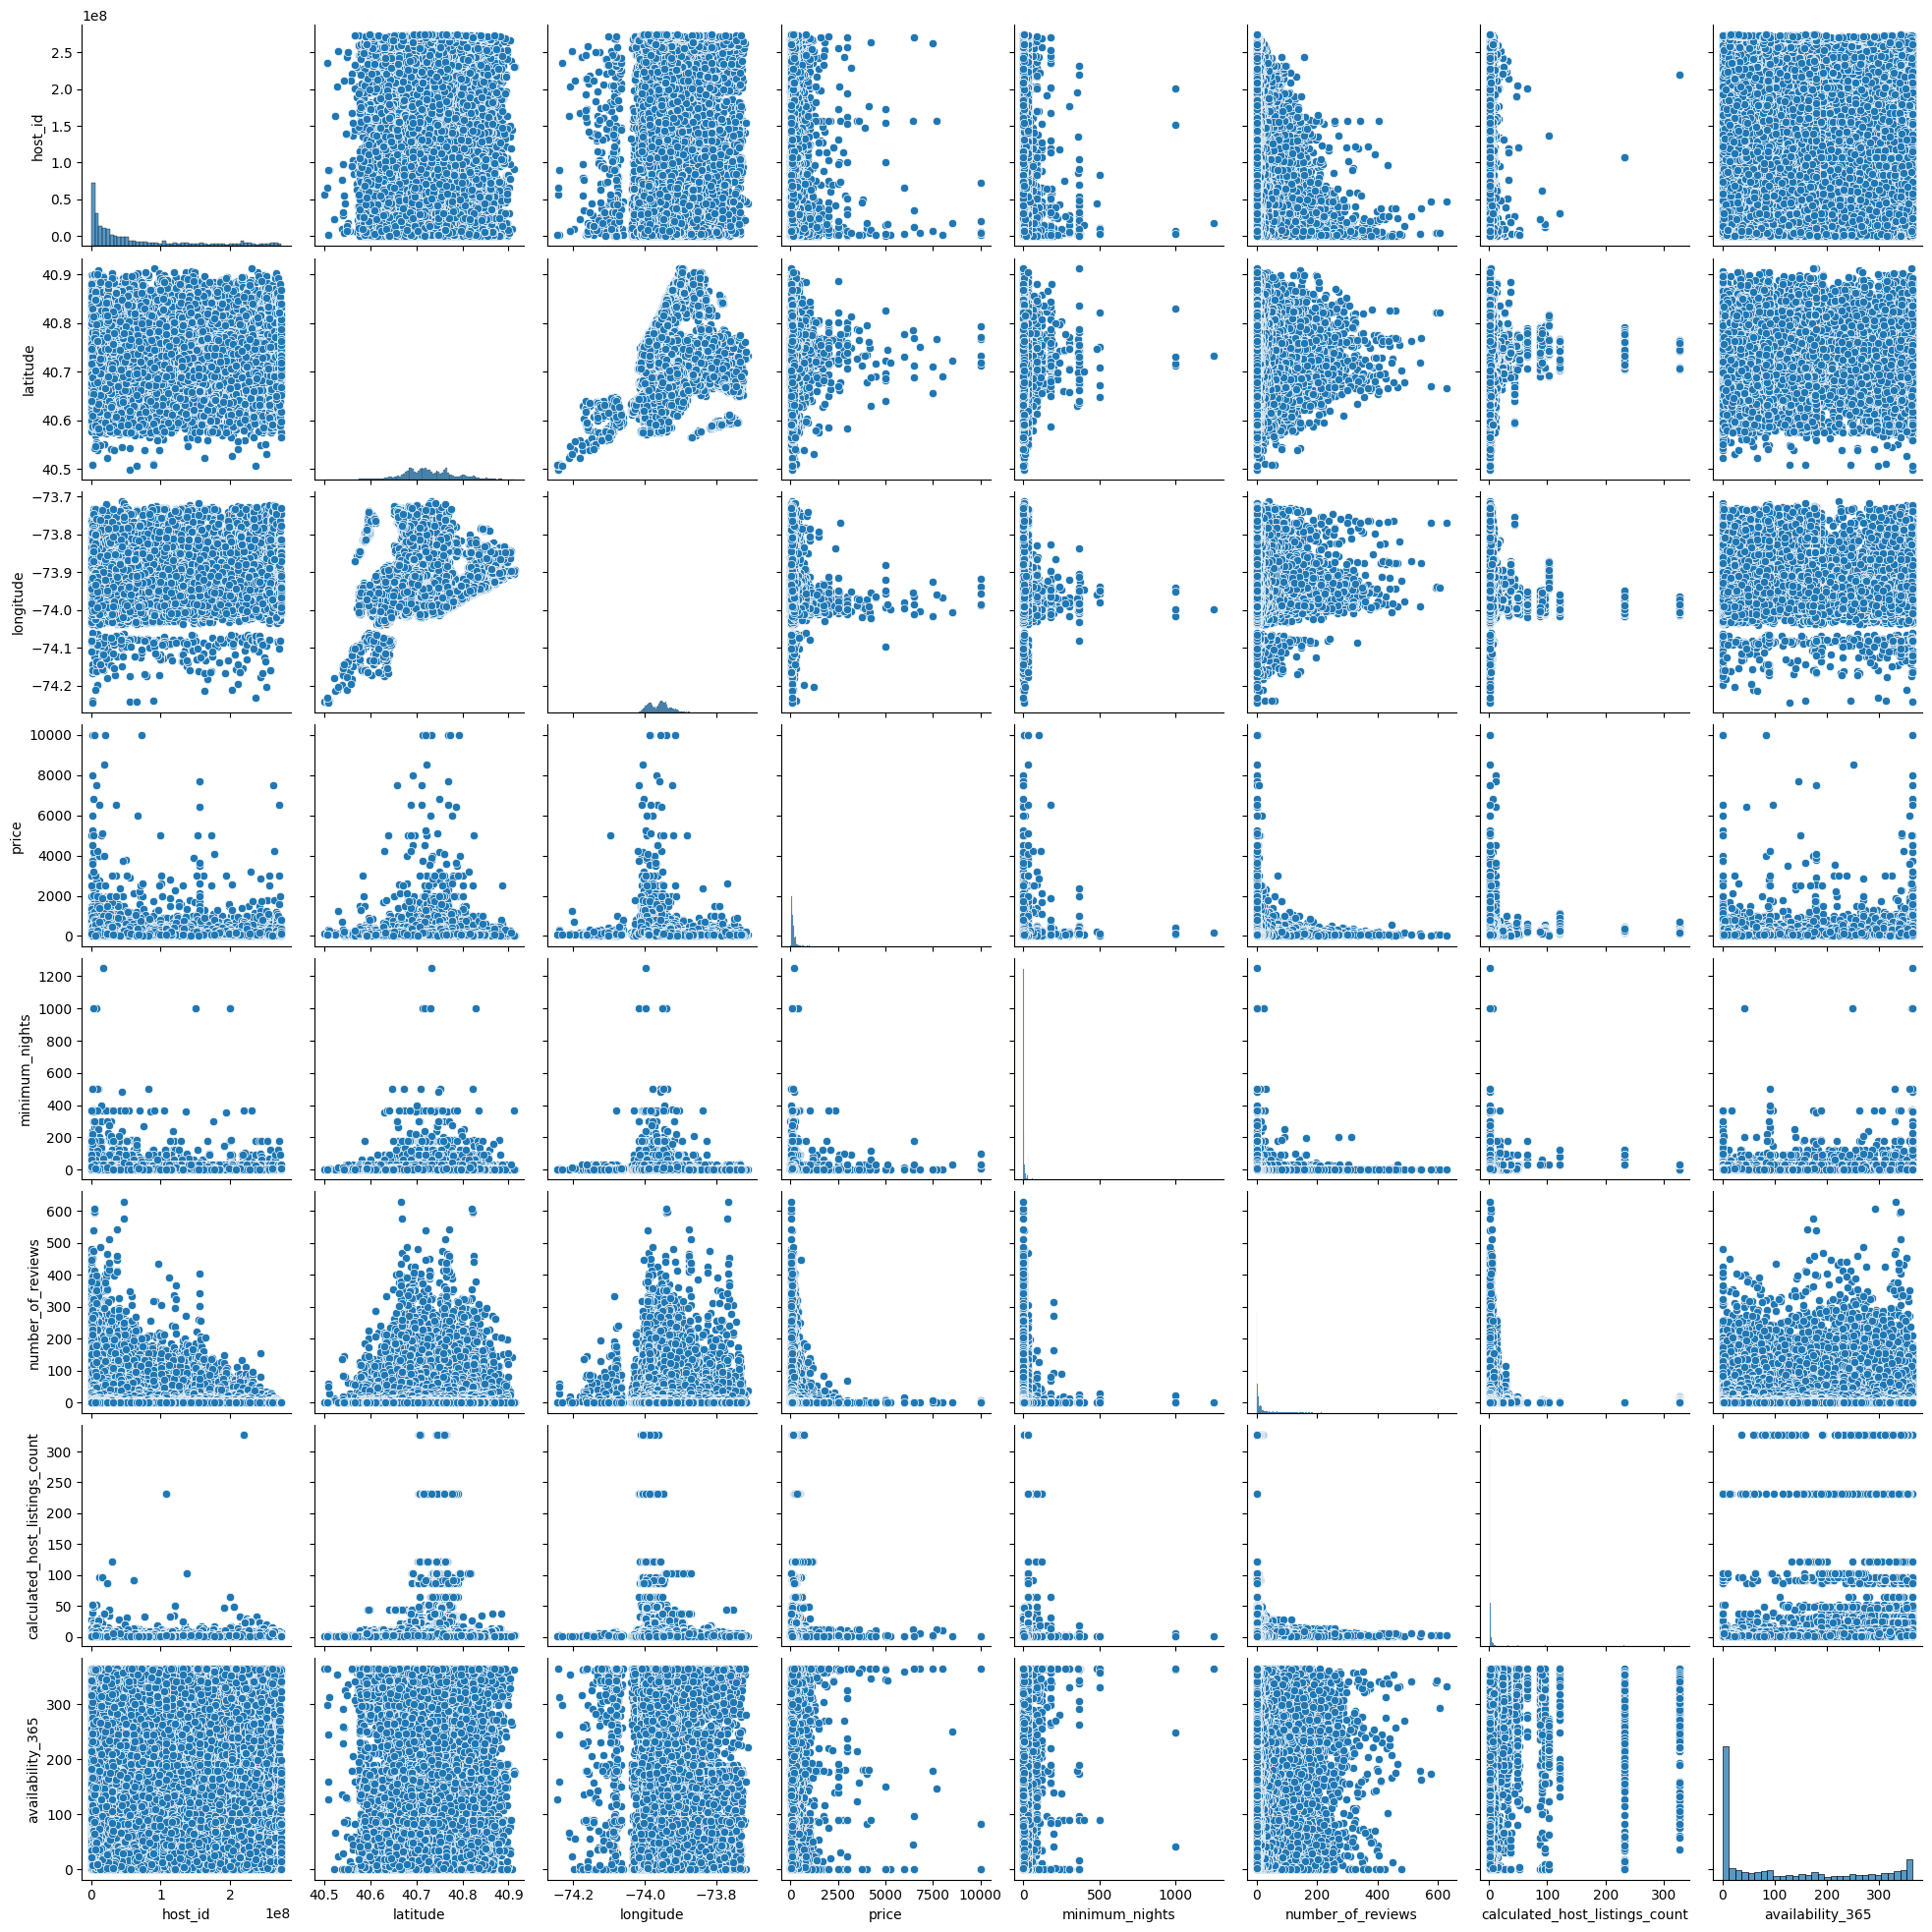

In [12]:
sns.pairplot(data = Datos_Reducidos)

## Analisis Multivariable

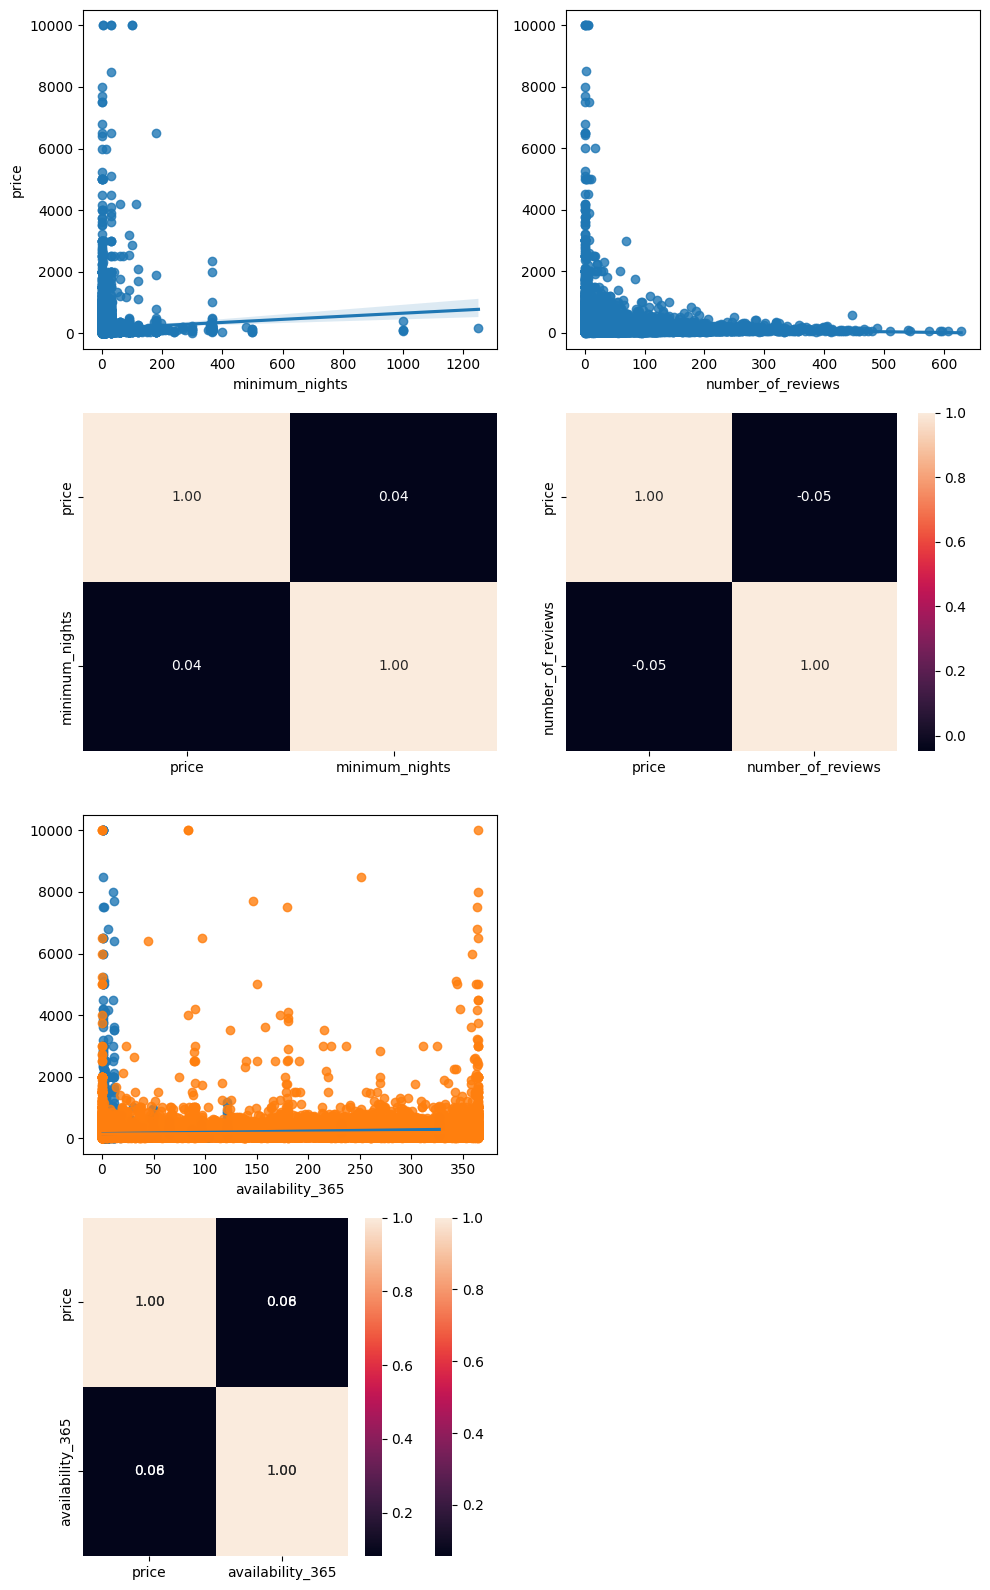

In [13]:
# Numerical - Numerical Analysis

# Create subplot canvas
fig, axis = plt.subplots(4, 2, figsize = (10, 16))

# Create Plates 
sns.regplot(ax = axis[0, 0], data = Datos_Reducidos, x = "minimum_nights", y = "price")
sns.heatmap(Datos_Reducidos[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = Datos_Reducidos, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(Datos_Reducidos[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = Datos_Reducidos, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(Datos_Reducidos[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)

sns.regplot(ax = axis[2, 0], data = Datos_Reducidos, x = "availability_365", y = "price").set(ylabel = None)
sns.heatmap(Datos_Reducidos[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)






fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

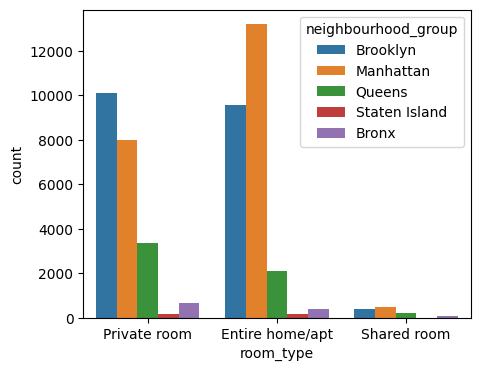

In [14]:
fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = Datos_Reducidos, x = "room_type", hue = "neighbourhood_group")

# Show the plot
plt.show()

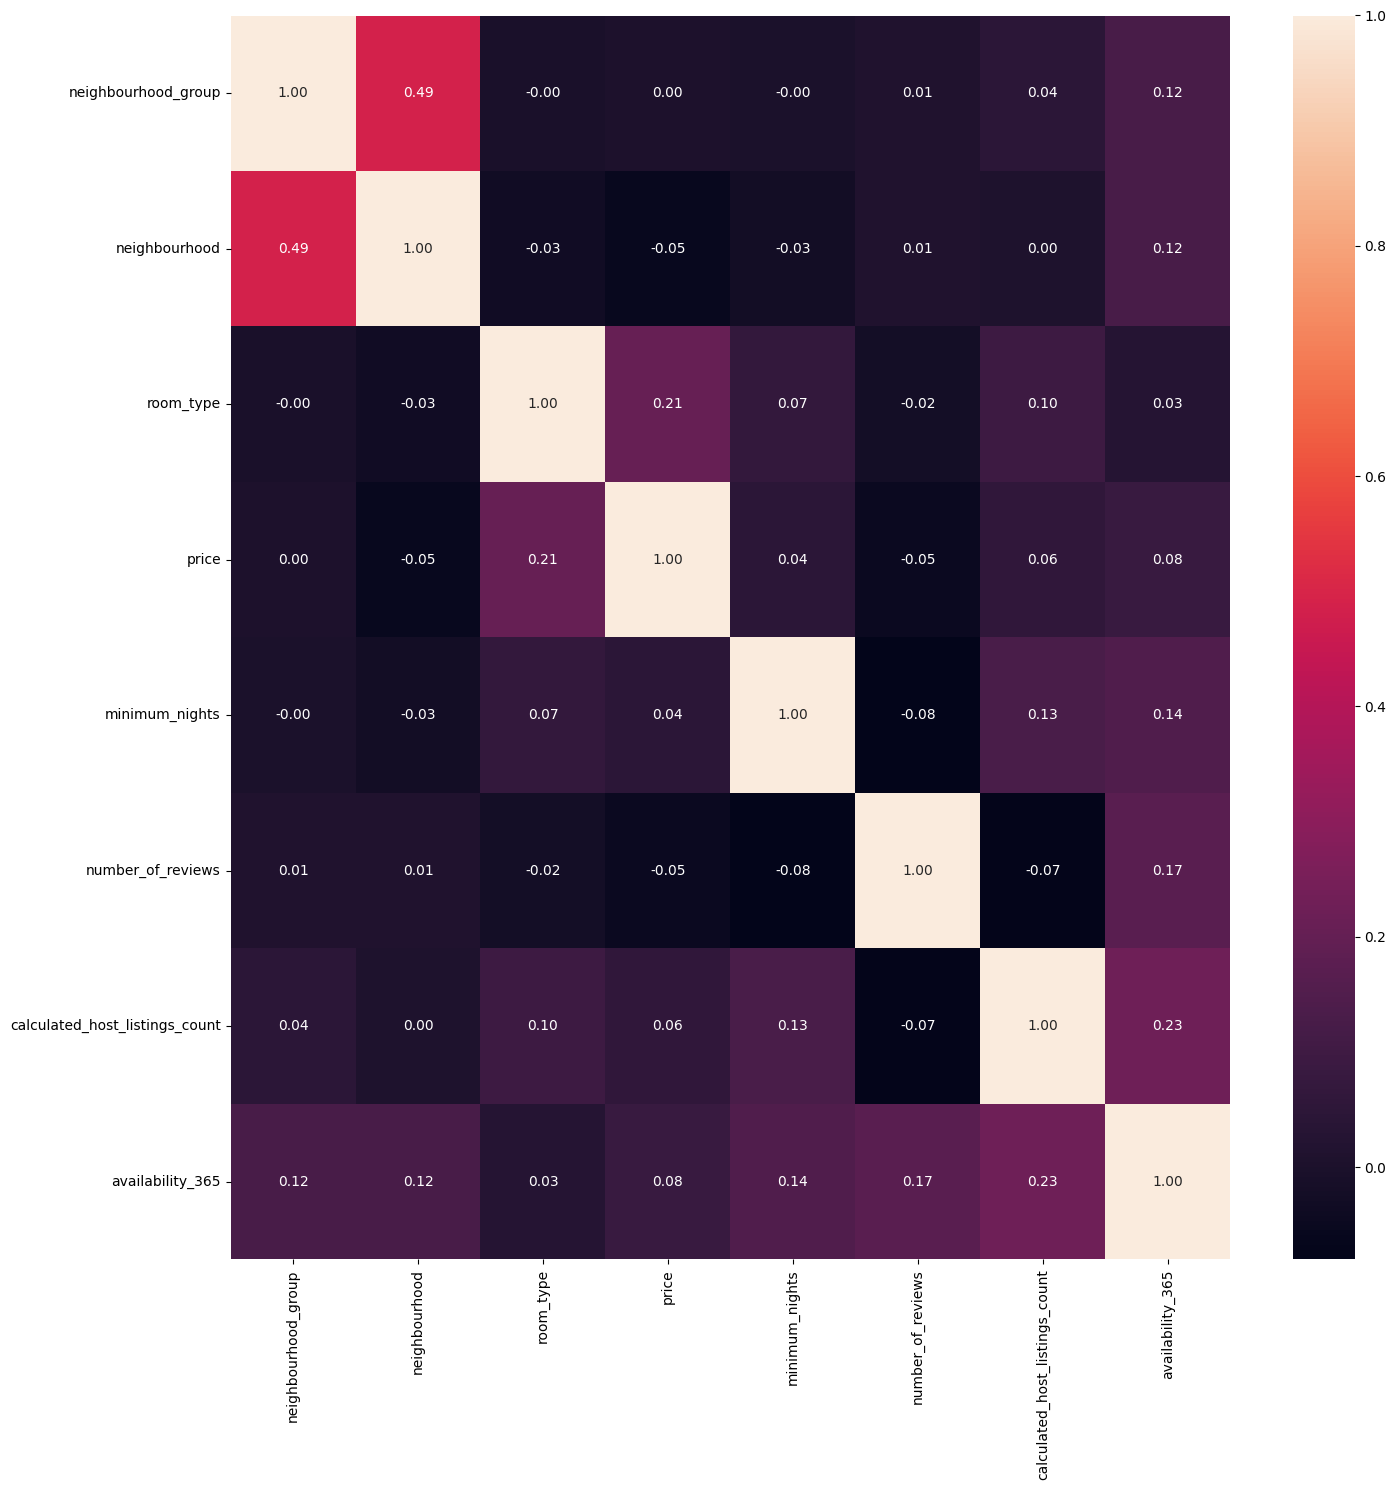

In [15]:
# Factorize the Room Type and Neighborhood Data
Datos_Reducidos["room_type"] = pd.factorize(Datos_Reducidos["room_type"])[0]
Datos_Reducidos["neighbourhood_group"] = pd.factorize(Datos_Reducidos["neighbourhood_group"])[0]
Datos_Reducidos["neighbourhood"] = pd.factorize(Datos_Reducidos["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(Datos_Reducidos[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

In [16]:
Datos_Reducidos.describe()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,0.786911,29.888782,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,0.844386,34.676634,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,0.000000,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,0.000000,7.500000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,1.000000,19.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,1.000000,37.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,4.000000,220.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


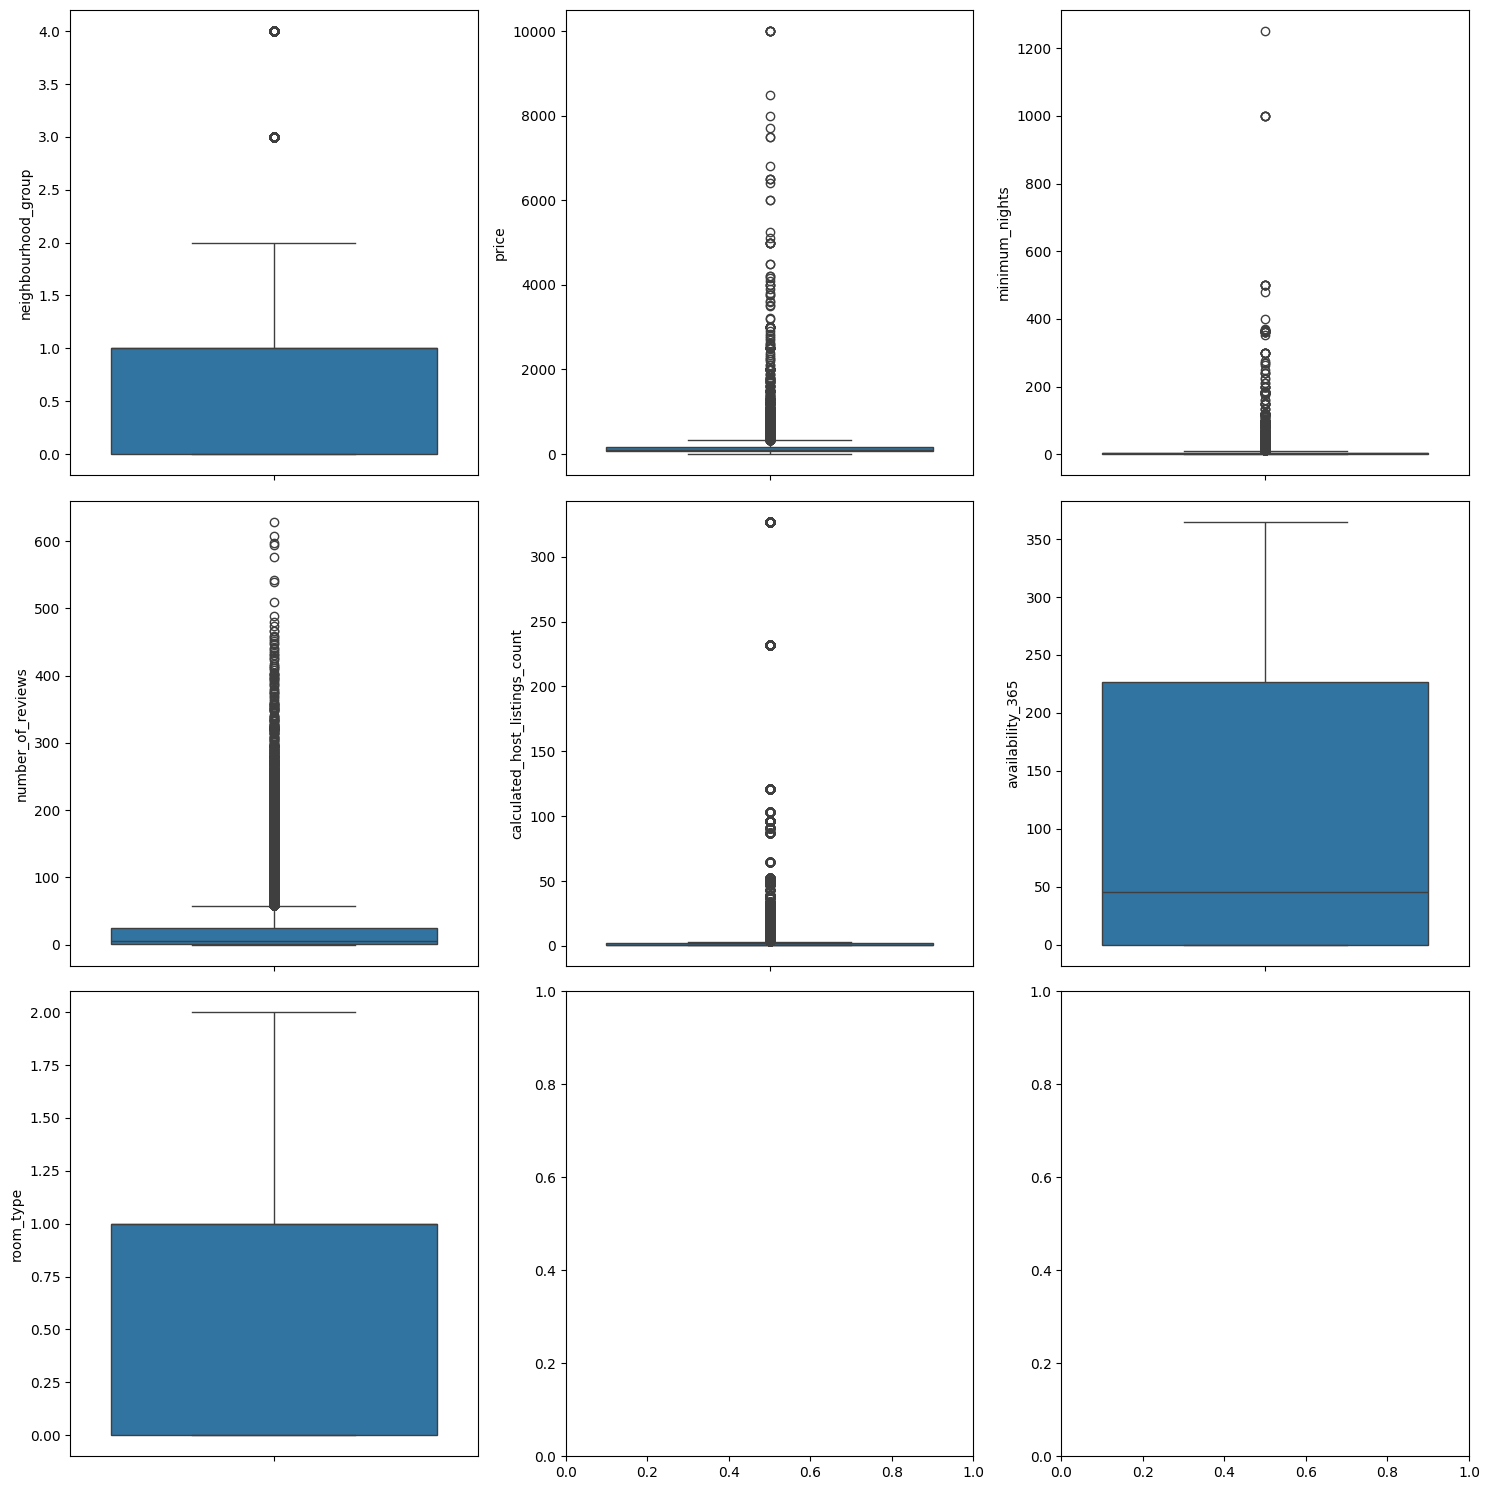

In [17]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = Datos_Reducidos, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = Datos_Reducidos, y = "price")
sns.boxplot(ax = axes[0, 2], data = Datos_Reducidos, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = Datos_Reducidos, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = Datos_Reducidos, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = Datos_Reducidos, y = "availability_365")
sns.boxplot(ax = axes[2, 0], data = Datos_Reducidos, y = "room_type")

plt.tight_layout()
plt.show()

Del Describe parece interesante observar con cuidado las siguientes columnas:
- price
- minimum_nights
- number_of_reviews
- calculated_host_listings_count

Asi que que haremos un Describe sobre esa Columna y un estudio de Rango Interquartilico (IQR) para Ver la dispersion del Qi al Q3

In [18]:
price_Descripcion = Datos_Reducidos["price"].describe()


Price_IQR = price_Descripcion["75%"] - price_Descripcion["25%"]
Q3_Price = price_Descripcion["75%"] + 1.5 * Price_IQR
Q1_Price = price_Descripcion["25%"] - 1.5 * Price_IQR

print(f"Los limites Superiores e inferiores de los Outliers: {round(Q3_Price, 2)} y {round(Q1_Price, 2)}, Con un rango Interqualtil {round(Price_IQR, 2)}")
print(price_Descripcion)

Los limites Superiores e inferiores de los Outliers: 334.0 y -90.0, Con un rango Interqualtil 106.0
count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


In [19]:
minimum_nights_Descripcion = Datos_Reducidos["minimum_nights"].describe()


minimum_nights_IQR = minimum_nights_Descripcion["75%"] - minimum_nights_Descripcion["25%"]
Q3_minimum_nights= minimum_nights_Descripcion["75%"] + 1.5 * minimum_nights_IQR
qu1_minimum_nights = minimum_nights_Descripcion["25%"] - 1.5 * minimum_nights_IQR

print(f"Los limites Superiores e inferiores de los Outliers: {round(Q3_minimum_nights, 2)}  y {round(qu1_minimum_nights, 2)}, Con un rango Interqualtil {round(minimum_nights_IQR, 2)}")
print(minimum_nights_Descripcion)

Los limites Superiores e inferiores de los Outliers: 11.0  y -5.0, Con un rango Interqualtil 4.0
count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64


In [20]:
calculated_host_listings_count_Descripcion = Datos_Reducidos["calculated_host_listings_count"].describe()


calculated_host_listings_count_IQR = calculated_host_listings_count_Descripcion["75%"] - calculated_host_listings_count_Descripcion["25%"]
Q3_calculated_host_listings_count= calculated_host_listings_count_Descripcion["75%"] + 1.5 * calculated_host_listings_count_IQR
qu1_calculated_host_listings_count = calculated_host_listings_count_Descripcion["25%"] - 1.5 * calculated_host_listings_count_IQR

print(f"Los limites Superiores e inferiores de los Outliers: {round(Q3_calculated_host_listings_count, 2)}  y {round(qu1_calculated_host_listings_count, 2)}, Con un rango Interqualtil {round(calculated_host_listings_count_IQR, 2)}")
print(calculated_host_listings_count_Descripcion)

Los limites Superiores e inferiores de los Outliers: 3.5  y -0.5, Con un rango Interqualtil 1.0
count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64


In [21]:
number_of_reviews_Descripcion = Datos_Reducidos["number_of_reviews"].describe()

number_of_reviews_IQR = number_of_reviews_Descripcion["75%"] - number_of_reviews_Descripcion["25%"]
Q3_number_of_reviews= number_of_reviews_Descripcion["75%"] + 1.5 * number_of_reviews_IQR
qu1_number_of_reviews = number_of_reviews_Descripcion["25%"] - 1.5 * number_of_reviews_IQR

print(f"Los limites Superiores e inferiores de los Outliers: {round(Q3_number_of_reviews, 2)} y {round(qu1_number_of_reviews, 2)}, Con un rango Interqualtil {round(number_of_reviews_IQR, 2)}")
print(number_of_reviews_Descripcion)

Los limites Superiores e inferiores de los Outliers: 58.5 y -33.5, Con un rango Interqualtil 23.0
count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64


In [22]:
Valor_0 = Datos_Reducidos[Datos_Reducidos["calculated_host_listings_count"] == 0].shape[0]
Valor_1 = Datos_Reducidos[Datos_Reducidos["calculated_host_listings_count"] == 1].shape[0]
Valor_2 = Datos_Reducidos[Datos_Reducidos["calculated_host_listings_count"] == 2].shape[0]
Valor_3 = Datos_Reducidos[Datos_Reducidos["calculated_host_listings_count"] == 3].shape[0]
Valor_4 = Datos_Reducidos[Datos_Reducidos["calculated_host_listings_count"] == 4].shape[0]

print("Cuantos 0", Valor_0)
print("Cuantos 1", Valor_1)
print("Cuantos 2", Valor_2)
print("Cuantos 3", Valor_3)
print("Cuantos 4", Valor_4)

Cuantos 0 0
Cuantos 1 32303
Cuantos 2 6658
Cuantos 3 2853
Cuantos 4 1440


In [ ]:
# De la data del PRice Voy a Borrar los registros que tengan Price = 0 
# Por otro lado hay un maximo de 10000, y veo que el Q3 esta cerca del 175. Por ahora solo voy a quitar el Valor Ceo
Data_Refinada =Datos_Reducidos[Datos_Reducidos["price"] >0]

# En las noches minimas tenemos Datos de Cero y de un MAximo de 1200
# Cero no lo considero un error, para mi sifinica que no tiene un Minimo, 
# sin embargo eso deberia estar indicado
# como una (1).  Tambien tiene un Q3 de 11,,  El Espacio de la muesta la voy a contener  como
# 0 < X < 5

Data_Refinada= Data_Refinada[Data_Refinada["minimum_nights"] >0]
Data_Refinada =Data_Refinada[Data_Refinada["minimum_nights"] <13]


# El Valor de Q3 de 3.5, Voy a tomar todos los numros menores  4
Data_Refinada =Data_Refinada[Data_Refinada["calculated_host_listings_count_Descripcion"] <5]

## Creación de la Data de Entrenamiento

In [23]:
#from sklearn.preprocessing import MinMaxScaler

#num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", 
#                 "availability_365", "neighbourhood_group", "room_type"]
#scaler = MinMaxScaler()
#scal_features = scaler.fit_transform(total_data[num_variables])
#df_scal = pd.DataFrame(scal_features, index = total_data.index, columns = num_variables)
#df_scal["price"] = total_data["price"]
#df_scal.head()

In [24]:
#from sklearn.feature_selection import chi2, SelectKBest
#from sklearn.model_selection import train_test_split

#X = df_scal.drop("price", axis = 1)
#y = df_scal["price"]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


#selection_model = SelectKBest(chi2, k = 4)
#selection_model.fit(X_train, y_train)
#ix = selection_model.get_support()
#X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
#X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

#X_train_sel.head()

In [25]:
#X_train_sel["price"] = list(y_train)
#X_test_sel["price"] = list(y_test)
#X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
#X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)